# Classification
1. Logistic Regression

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 1. Simple Logistic Regression

Model for Simple logistic regression: $p = \frac{\mathrm{e}^y}{1+\mathrm{e}^y}$

where

$y = \beta_0 + \beta x$


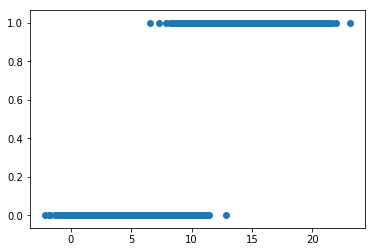

In [51]:
# simulate binary data
x0 = np.random.normal(5, 2.5, 1000)
x1 = np.random.normal(15, 2.5, 1000)

x = np.append(x0, x1)
y = np.asarray([0.0] * len(x0) + [1.0] * len(x1))

plt.scatter(x, y)
plt.show()

After several tries the cost function that did well was:

$-\sum_{i=1}^{n} [y_i\log(p(x_i)) + (1-y_i) \log(1-p(x_i))]$

* log terms are necessary else optimiser does not update significantly or gets stuck in some local minima.
* Tried to use reduce_prod() instead of reduce_mean(). Optimiser could not calculate cost and update weights. Cost were set to 0 for all epochs.

In [103]:
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

# weights (b0 and b1)
w = tf.Variable([np.random.randn(), np.random.randn()], dtype=tf.float32)

y_linear = tf.add(w[0], tf.multiply(w[1], X))
model = tf.sigmoid(y_linear)

# if prob > 0.5 set y=1 else set y=0
activation = tf.to_float(tf.greater(model, 0.5))

# has to include log terms
cost = tf.negative(tf.reduce_mean(tf.add(Y * tf.log(model), (1-Y)*tf.log(1-model))))

accuracy = tf.reduce_mean(tf.to_float(tf.equal(Y, activation)))

epochs=500

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epochs):
        sess.run(train_op, feed_dict={X: x, Y: y})
    
    weights = sess.run(w)
    c = sess.run(cost, feed_dict={X: x, Y: y})
    acc = sess.run(accuracy, feed_dict={X: x, Y: y})
    print('i={}: w={}, accuracy={}, cost={}'.format(i, weights, acc, c))
    
    all_x = np.linspace(min(x), max(x), len(x))
    y_fitted = sess.run(model, feed_dict={X: all_x})

i=499: w=[-2.9689379  0.3492842], accuracy=0.9599999785423279, cost=0.22923403978347778


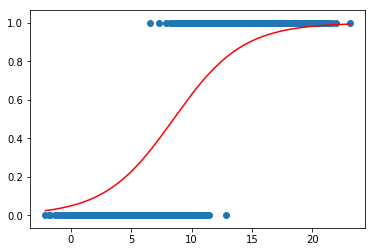

In [104]:
# plot fitted model
plt.scatter(x, y)
plt.plot(all_x, y_fitted, 'r')
plt.show()